Contaminated_data.shape: (10000, 4000)
Clean_data.shape: (10000, 4000)


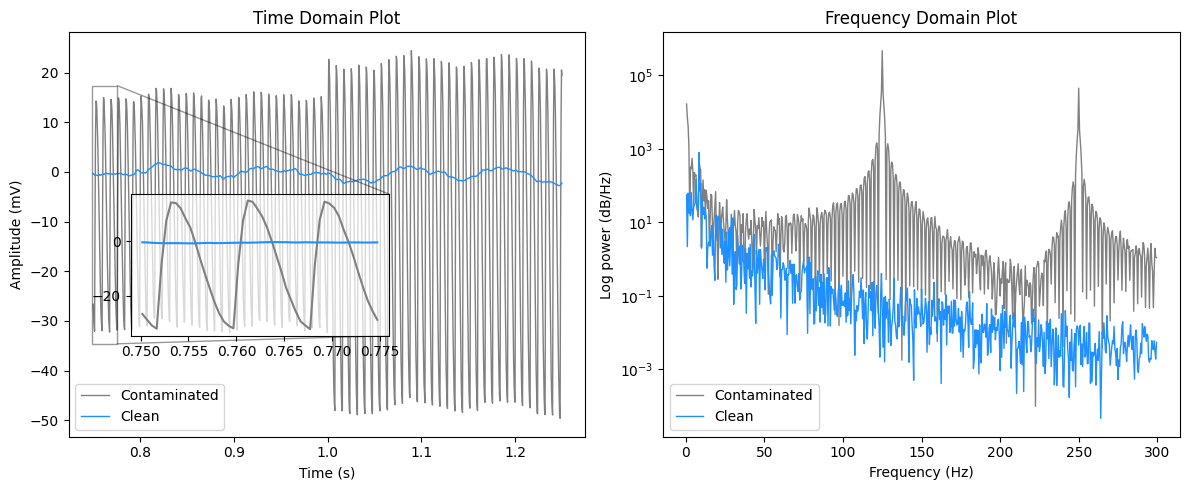

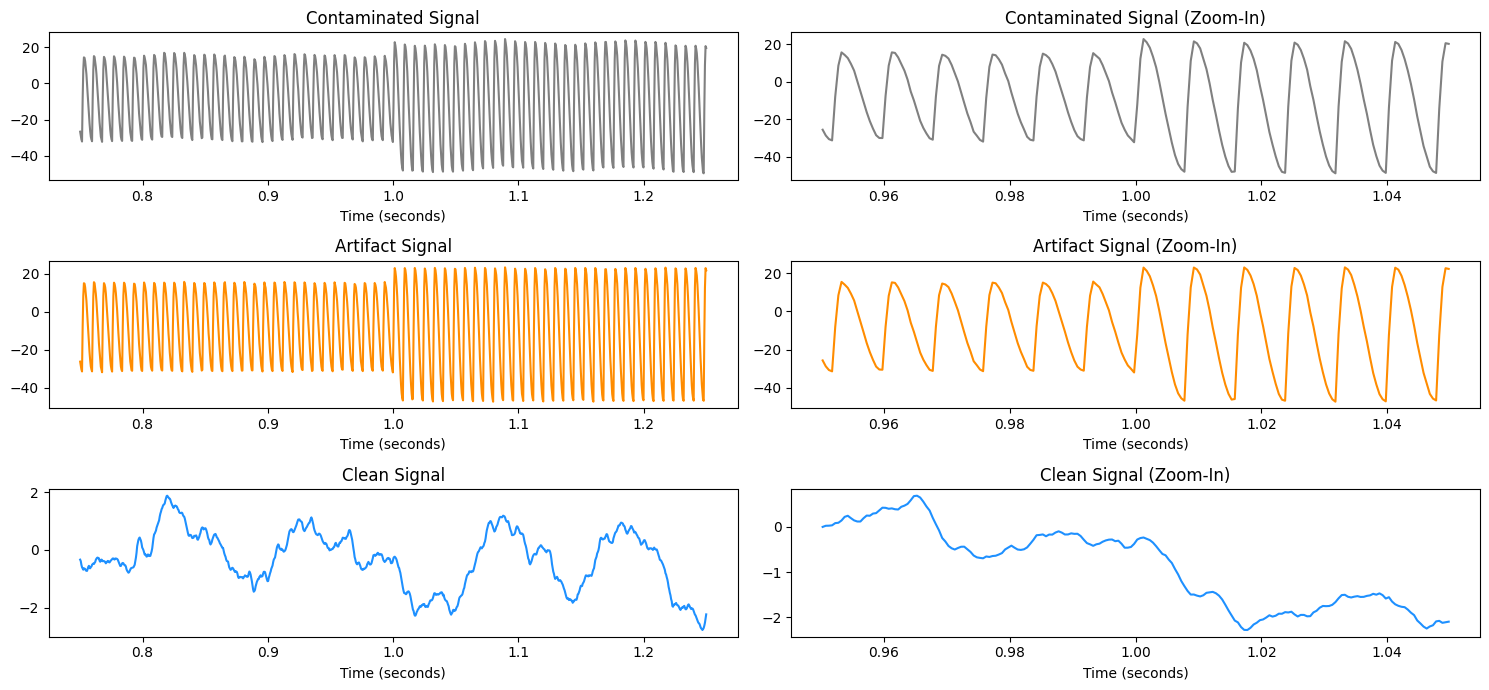

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sys

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sys.path.append('../../tool_code/python_tool_code/function/') # "~~/tool_code/plot/" (상대 경로)
from DataPlot import Data_Load_Plot, Result_Plot, Result_Plot_paper, Loss_Plot

datapath = "C:/Users/stell/OneDrive/바탕 화면/10000_data/"

Contaminated_data, Clean_data, Artifact_data = Data_Load_Plot(datapath)

n_channels, n_samples = Contaminated_data.shape

mean_data = np.mean(Contaminated_data, axis=0) # len; 4000

filtered_data = np.zeros_like(Contaminated_data)
for i in range(len(Contaminated_data)):
    filtered_data[i, :] = Contaminated_data[i, :] - mean_data[:]

# print(len(mean_data), during_data.shape) # 4000 (32, 4000)

# 채널 정보
stim_ch = 11
target_ch = 12

fs = 2000  # 샘플링 주파수
frequencies = np.linspace(-fs/2, fs/2, n_samples)  # 주파수 범위 설정
time = np.arange(n_samples) / fs # 시간 범위 설정

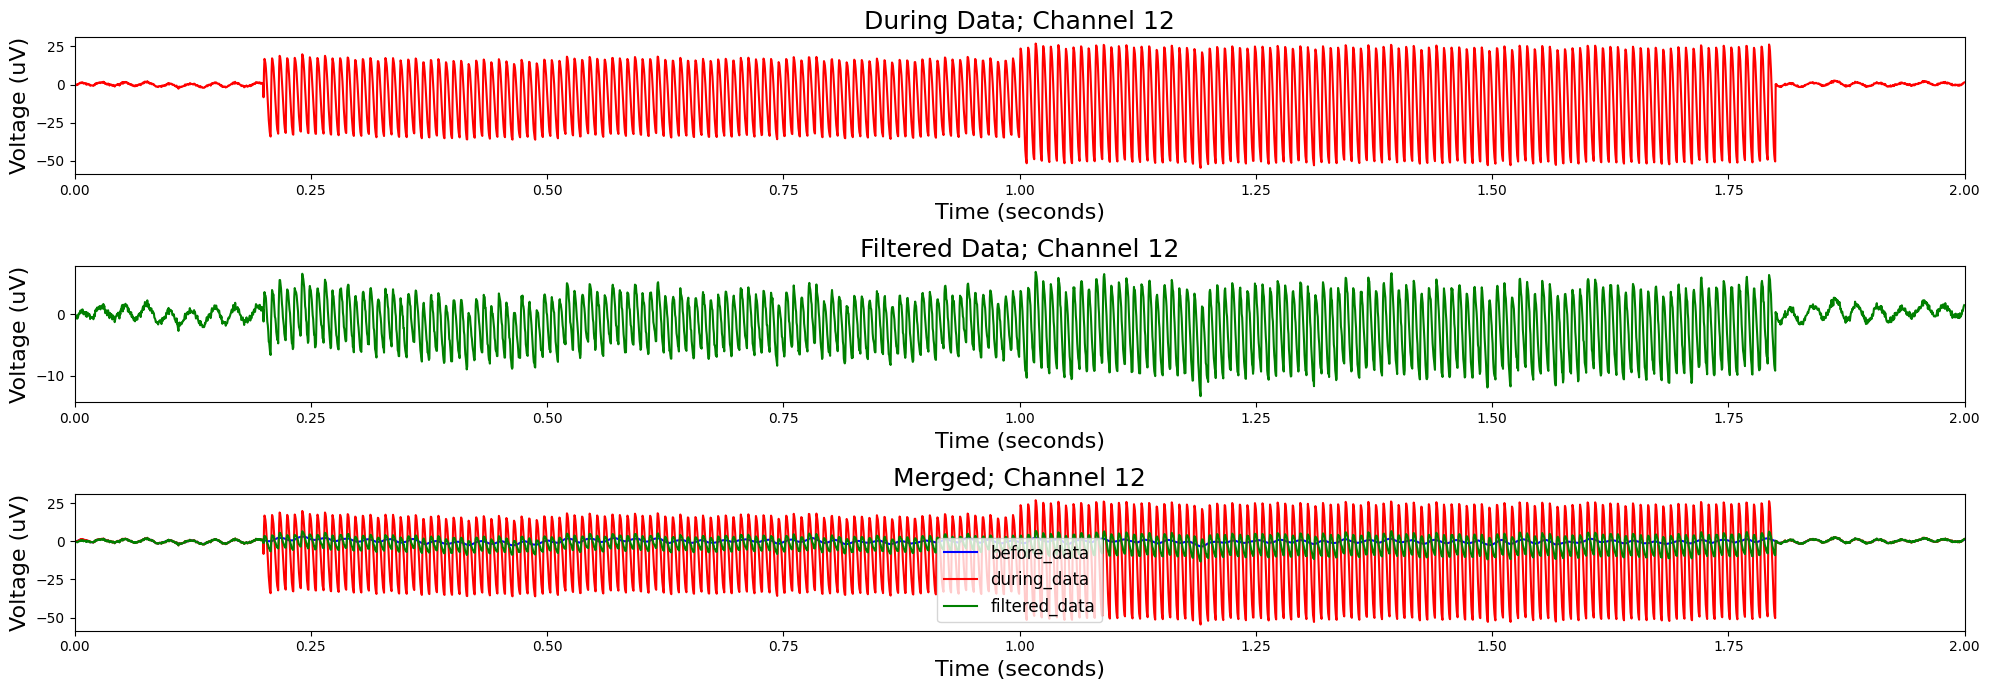

In [9]:
# 결과 플로팅 - 내가 볼 채널만
plt.figure(figsize=(20, 7))

# 원본 데이터
plt.subplot(3, 1, 1)
plt.plot(time, Contaminated_data[target_ch, :], 'r')
plt.xlim(0, 2)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'During Data; Channel {target_ch}', fontsize=18)

# 필터된 데이터
plt.subplot(3, 1, 2)
plt.plot(time, filtered_data[target_ch, :], 'g')
plt.xlim(0, 2)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'Filtered Data; Channel {target_ch}', fontsize=18)

# Time domain
plt.subplot(3, 1, 3)
plt.plot(time, Clean_data[target_ch, :], 'b', label='before_data')
plt.plot(time, Contaminated_data[target_ch, :], 'r', label='during_data')
plt.plot(time, filtered_data[target_ch, :], 'g', label='filtered_data')
plt.xlim(0, 2)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'Merged; Channel {target_ch}', fontsize=18)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

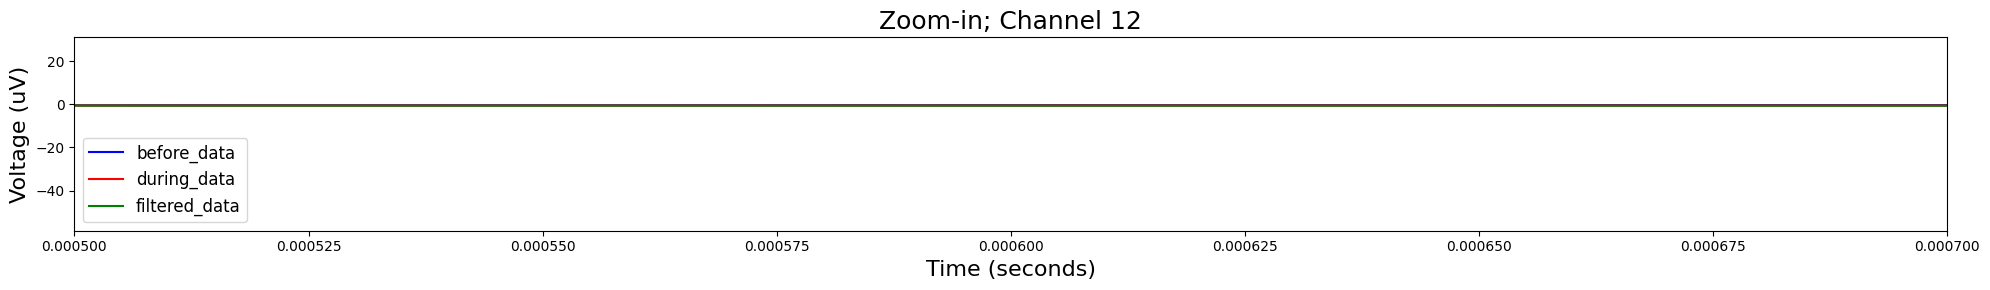

In [10]:
# 결과 플로팅 - 줌인
plt.figure(figsize=(20, 3))

start_t = 0.0005
end_t = 0.0007

plt.plot(time, Clean_data[target_ch, :], 'b', label='before_data')
plt.plot(time, Contaminated_data[target_ch, :], 'r', label='during_data')
plt.plot(time, filtered_data[target_ch, :], 'g', label='filtered_data')
plt.xlim(start_t, end_t)
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel('Voltage (uV)', fontsize=16)
plt.title(f'Zoom-in; Channel {target_ch}', fontsize=18)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

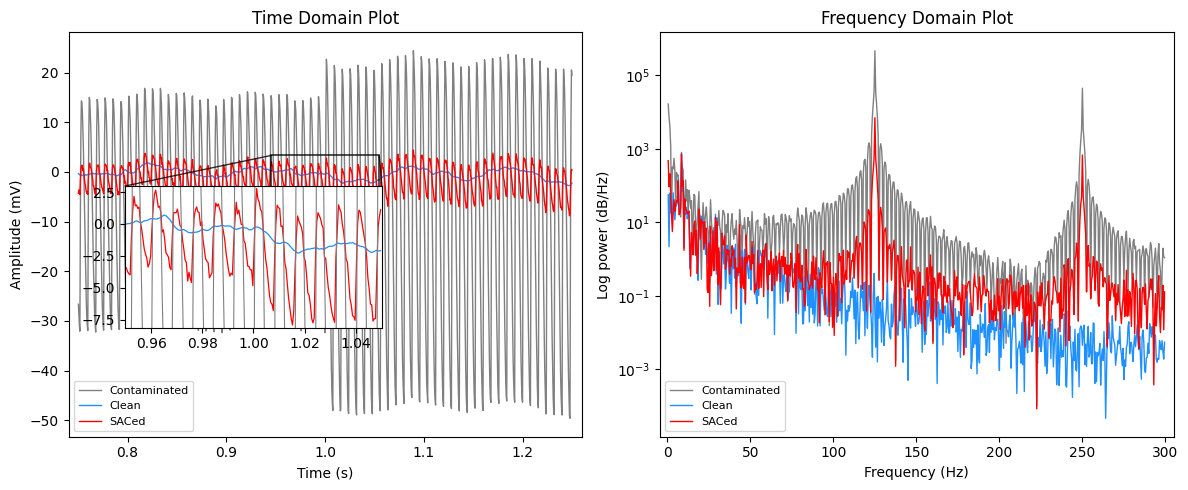

< MSE >
Time Domain MSE: 3.7105686904434987 ± 5.887090605616301
Frequency Domain MSE: 149735.00378736004 ± 769089.8516998361
Time + Frequency MSE: 1007.0774914747421 ± 3613.5296041053357


In [11]:
save_path = '../../result/data_10000/existing_SAC/CAR/'
save_title = 'CAR'

Result_Plot(Contaminated_data, filtered_data, Clean_data, save_path, save_title)